<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9D%D0%B0%D1%85%D0%BE%D0%B6%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D0%BB%D0%BE%D0%B6%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BD%D1%82%D1%83%D1%80%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нахождение контуров

# Finding contours


В этом уроке мы научимся находить более сложные контуры и обводить их в необходимые нам формы


In this lesson we will learn how to find more complex outlines and shape them into the shapes we need

Существует довольно обширный список свойств, которые мы можем вычислить для контуров. Пройдемся по самым ключевым здесь.

There is a fairly extensive list of properties that we can calculate for contours. Let's walk through the most key ones here.




In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_26.Contour.zip
!unzip Lesson_26.Contour.zip
%cd /content/Lesson_26.Contour

--2022-02-02 18:43:38--  http://dataudt.ru/datasets/cv/Lesson_26.Contour.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9320 (9.1K) [application/zip]
Saving to: ‘Lesson_26.Contour.zip’

Lesson_26.Contour.z 100%[===================>]   9.10K  --.-KB/s    in 0s      

2022-02-02 18:43:38 (114 MB/s) - ‘Lesson_26.Contour.zip’ saved [9320/9320]

Archive:  Lesson_26.Contour.zip
  inflating: Lesson_26.Contour/Contour.py  
  inflating: Lesson_26.Contour/shapes_01.png  
  inflating: Lesson_26.Contour/shapes_02.png  
/content/Lesson_26.Contour


In [2]:
# импортируем необходимые модули
# import the necessary packages
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import imutils

In [3]:
# создаем отдельный словарь с аргументами 
# create a separate dictionary with arguments
args = {
 # путь к входному изображению 
 # path to input image
'image':"shapes_02.png", 
}


> **«Центроид» или «центр масс»** - это координата центра объекта на изображении. 

> **The "centroid" or "center of mass "** is the coordinate of the center of the object in the image. 

По факту, это просто среднее положение всех координат по контуру формы





In fact, it is just the average position of all coordinates along the contour of the shape

Centroids


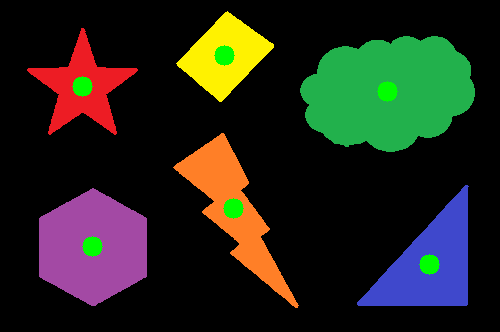

In [4]:
# загружаем изображение и конвертируем его в градации серого
# load the image and convert it to grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# найдём внешние контуры на изображении
# find external contours in the image
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
clone = image.copy()

# перебираем контуры
# loop over the contours
for c in cnts:
	# вычисляем моменты контура, которые можно использовать
    # для вычисления центроида или "центра масс" области
    # compute the moments of the contour which can be used to compute the
	# centroid or "center of mass" of the region
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])

    # рисуем центр контура на изображении
    # draw the center of the contour on the image
	cv2.circle(clone, (cX, cY), 10, (0, 255, 0), -1)

# отобразим получившееся изображение
# show the output image
print("Centroids") 
cv2_imshow(clone)

> **Площадь контура** -  является количество пикселей, которые находятся внутри контура.

> **contour area** - is the number of pixels that are inside the contour.


> **Периметр контура** (иногда называемый  длиной дуги ) - это длина контура

> **contour perimeter** (sometimes called arc length) is the length of the contour

Contour #1 -- area: 9426.00, perimeter: 378.88
Contour #2 -- area: 6861.00, perimeter: 396.39
Contour #3 -- area: 6189.00, perimeter: 512.32
Contour #4 -- area: 15036.00, perimeter: 519.04
Contour #5 -- area: 4332.00, perimeter: 434.13
Contour #6 -- area: 4423.00, perimeter: 273.24
Contours


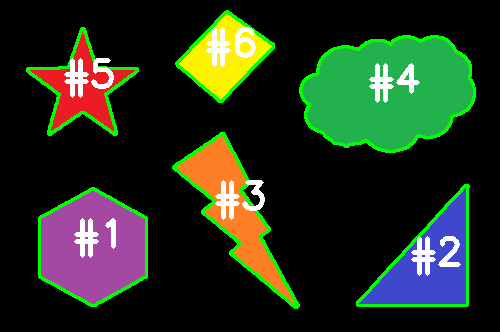

In [5]:
clone = image.copy()

# перебираем контуры
# loop over the contours again
for (i, c) in enumerate(cnts):
	# вычисляем площадь и периметр контура
    # compute the area and the perimeter of the contour
	area = cv2.contourArea(c)
	perimeter = cv2.arcLength(c, True)
	print("Contour #{} -- area: {:.2f}, perimeter: {:.2f}".format(i + 1, area, perimeter))

	# рисуем контур на изображении
    # draw the contour on the image
	cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)

    # вычисляем центр контура и рисуем номер контура
    # compute the center of the contour and draw the contour number
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
	cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
		1.25, (255, 255, 255), 4)

# выведем на экран получившееся изображение
# show the output image
print("Contours") 
cv2_imshow(clone)

> **Ограничивающий прямоугольник** - это вертикальный прямоугольник, который «ограничивает» и «содержит» всю контурную область изображения.

> **bounding rectangle** is a vertical rectangle that "bounds" and "contains" the entire outline area of the image.

Ограничивающий прямоугольник состоит из четырех компонентов: начальной  координаты x и y прямоугольника, а затем ширины и высоты прямоугольника.

Для его построения будем использовать функцию `cv2.boundingRect()`



A bounding rectangle consists of four components: the initial x and y coordinates of the rectangle, and then the width and height of the rectangle.

We'll use the function `cv2.boundingRect()` to build it.


Bounding Boxes


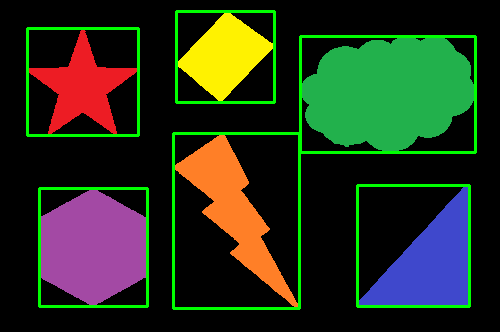

In [6]:
# скопируем исходное изображение
# clone the original image
clone = image.copy()

# перебираем контуры
# loop over the contours
for c in cnts:
	# подгоняем ограничивающую рамку к контуру
    # fit a bounding box to the contour
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 2)

# покажем выходное изображение
# show the output image
print("Bounding Boxes") 
cv2_imshow(clone)

> **Повернутые ограничивающие рамки** - модифицированный ограничивающий прямоугольник. 

> **Turned bounding boxes** are a modified bounding rectangle. 

Хотя простые ограничивающие рамки хороши, но они не учитывают  поворот фигуры на изображении. Чтобы учесть ротацию, нам нужно расширить наш подход, вычислив и добавив угол поворота нашей фигуры. 



While simple bounding boxes are nice, they don't take into account the rotation of the figure in the image. To account for rotation, we need to extend our approach by calculating and adding the rotation angle of our figure. 

Rotated Bounding Boxes


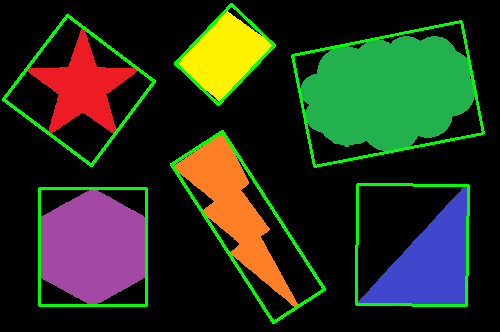

In [7]:
clone = image.copy()

# перебираем контуры
# loop over the contours
for c in cnts:
    # подгоняем повернутую ограничивающую рамку к контуру
    # и рисуем повернутую ограничивающую рамку
    # fit a rotated bounding box to the contour and draw a rotated bounding box
	box = cv2.minAreaRect(c)
	box = np.int0(cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box))
	cv2.drawContours(clone, [box], -1, (0, 255, 0), 2)

# отобразим выходное изображение
# show the output image
print("Rotated Bounding Boxes") 
cv2_imshow(clone)

> **Минимальные окружающие круги** - это круги, которые «ограничивают» и «содержат» всю контурную область изображения.

> **Minimal surrounding circles** are circles that "bound" and "contain" the entire contour area of the image.

Самая важная функция, на которую следует обратить внимание здесь -  это 
`cv2.minEnclosingCircle`, которая берет наш контур и возвращает координаты центра круга вместе с  радиусом круга.



The most important function to look at here is 
`cv2.minEnclosingCircle`, which takes our outline and returns the coordinates of the circle center along with the circle radius.

Min-Enclosing Circles


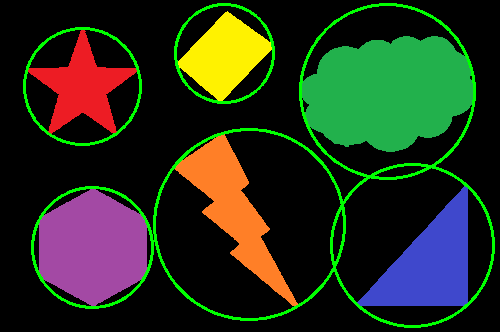

In [8]:
clone = image.copy()

# перебираем контуры
# loop over the contours
for c in cnts:
	# подгоняем минимальную окружность к контуру
    # fit a minimum enclosing circle to the contour
	((x, y), radius) = cv2.minEnclosingCircle(c)
	cv2.circle(clone, (int(x), int(y)), int(radius), (0, 255, 0), 2)

# отобразим получившееся изображение
# show the output image
print("Min-Enclosing Circles") 
cv2_imshow(clone)

> **Подгонка эллипса** - модифицированный ограничивающий круг.

> **Fit ellipse** is a modified bounding circle.

Подгонка эллипса к контуру во многом похожа на подгонку повернутого прямоугольника к контуру.
Под капотом OpenCV вычисляет повернутый прямоугольник контура. А затем он берет повернутый прямоугольник и вычисляет эллипс, который помещается в повернутую область.



Fitting an ellipse to a path is much like fitting a rotated rectangle to a path.
Under the hood, OpenCV calculates the rotated rectangle of a contour. And then it takes the rotated rectangle and calculates an ellipse that fits into the rotated area.


Ellipses


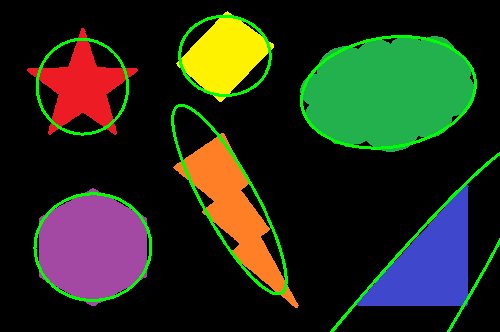

In [9]:
clone = image.copy()

# перебираем контуры
# loop over the contours
for c in cnts:
	# чтобы соответствовать эллипсу, 
    # наш контур должен иметь не менее 5 точек
    # to to fit an ellipse, our contour must have at least 5 points
	if len(c) >= 5:
		# подгоняем элипс к контуру
        # fit an ellipse to the contour
		ellipse = cv2.fitEllipse(c)
		cv2.ellipse(clone, ellipse, (0, 255, 0), 2)

# выведем на экран получившееся изображение
# show the output image
print("Ellipses") 
cv2_imshow(clone)
